In [1]:
from rational.utils.examples.keras import prepare_data_keras, compile_keras_model
import numpy as np
import os

import matplotlib.pyplot as plt
from tensorflow.random import set_seed
plt.style.use('bmh')

In [2]:
seed = 4242
set_seed(seed)
np.random.seed(seed)
os.environ['TF_DETERMINISTIC_OPS'] = '1'
os.environ["CUDA_VISIBLE_DEVICES"] = '2'

In [3]:
epochs = 50
train_generator, test_generator = prepare_data_keras(seed=seed, batch_size=256)

/home/ml-jzimmermann/notebooks/venv/lib/python3.6/site-packages/keras_preprocessing/image/image_data_generator.py:349: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, which overrides setting of `featurewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


In [4]:
model = compile_keras_model(rational=False)

history = model.fit(train_generator, epochs=epochs, validation_data=test_generator, verbose=1)
relu_history = history.history

Epoch 1/50
235/235 [==============================] - 19s 82ms/step - loss: 2.2451 - accuracy: 0.2980 - val_loss: 1.6926 - val_accuracy: 0.4576
Epoch 2/50
235/235 [==============================] - 18s 77ms/step - loss: 0.7037 - accuracy: 0.7703 - val_loss: 0.2690 - val_accuracy: 0.9134
Epoch 3/50
235/235 [==============================] - 19s 79ms/step - loss: 0.2416 - accuracy: 0.9228 - val_loss: 0.1225 - val_accuracy: 0.9614
Epoch 4/50
235/235 [==============================] - 18s 77ms/step - loss: 0.1628 - accuracy: 0.9489 - val_loss: 0.0914 - val_accuracy: 0.9714
Epoch 5/50
235/235 [==============================] - 18s 78ms/step - loss: 0.1300 - accuracy: 0.9588 - val_loss: 0.0839 - val_accuracy: 0.9713
Epoch 6/50
235/235 [==============================] - 18s 78ms/step - loss: 0.1095 - accuracy: 0.9658 - val_loss: 0.0707 - val_accuracy: 0.9768
Epoch 7/50
235/235 [==============================] - 18s 79ms/step - loss: 0.0965 - accuracy: 0.9691 - val_loss: 0.0675 - val_accuracy:

In [5]:
model = compile_keras_model(rational=True)

history = model.fit(train_generator, epochs=epochs, validation_data=test_generator, verbose=1)
rational_history = history.history

Epoch 1/50
235/235 [==============================] - 46s 197ms/step - loss: 2.2988 - accuracy: 0.1162 - val_loss: 2.2905 - val_accuracy: 0.1444
Epoch 2/50
235/235 [==============================] - 46s 195ms/step - loss: 1.5325 - accuracy: 0.4970 - val_loss: 0.2400 - val_accuracy: 0.9247
Epoch 3/50
235/235 [==============================] - 46s 196ms/step - loss: 0.1997 - accuracy: 0.9381 - val_loss: 0.0837 - val_accuracy: 0.9729
Epoch 4/50
235/235 [==============================] - 46s 196ms/step - loss: 0.1138 - accuracy: 0.9640 - val_loss: 0.0673 - val_accuracy: 0.9781
Epoch 5/50
235/235 [==============================] - 46s 196ms/step - loss: 0.0803 - accuracy: 0.9747 - val_loss: 0.0480 - val_accuracy: 0.9862
Epoch 6/50
235/235 [==============================] - 46s 195ms/step - loss: 0.0628 - accuracy: 0.9806 - val_loss: 0.0460 - val_accuracy: 0.9850
Epoch 7/50
235/235 [==============================] - 46s 195ms/step - loss: 0.0539 - accuracy: 0.9829 - val_loss: 0.0409 - val_ac

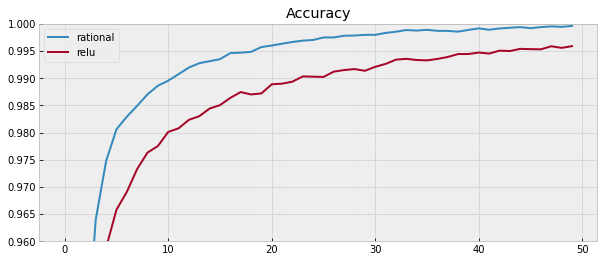

In [6]:
plt.figure(figsize=(10, 4))
plt.plot(range(epochs), rational_history['accuracy'], label='rational')
plt.plot(range(epochs), relu_history['accuracy'], label='relu')
plt.title('Accuracy')
plt.ylim((0.96, 1))
plt.legend()
plt.show()

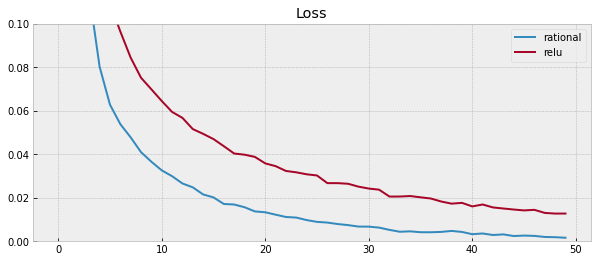

In [7]:
plt.figure(figsize=(10, 4))
plt.plot(range(epochs), rational_history['loss'], label='rational')
plt.plot(range(epochs), relu_history['loss'], label='relu')
plt.title('Loss')
plt.ylim((0, 0.1))
plt.legend()
plt.show()

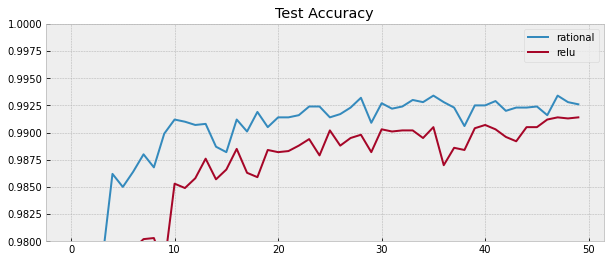

In [8]:
plt.figure(figsize=(10, 4))
plt.plot(range(epochs), rational_history['val_accuracy'], label='rational')
plt.plot(range(epochs), relu_history['val_accuracy'], label='relu')
plt.title('Test Accuracy')
plt.ylim((0.98, 1))
plt.legend()
plt.show()

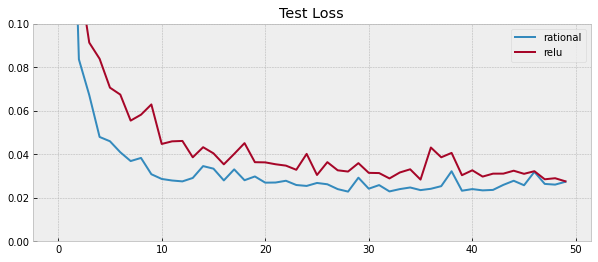

In [9]:
plt.figure(figsize=(10, 4))
plt.plot(range(epochs), rational_history['val_loss'], label='rational')
plt.plot(range(epochs), relu_history['val_loss'], label='relu')
plt.title('Test Loss')
plt.ylim((0, 0.1))
plt.legend()
plt.show()